(150,)
exp 0 error 1
exp 1 error 2
exp 2 error 3
exp 3 error 2
exp 4 error 0
exp 5 error 1
exp 6 error 1
exp 7 error 0
exp 8 error 1
exp 9 error 2
exp 10 error 0
exp 11 error 4
exp 12 error 3
exp 13 error 3
exp 14 error 1
exp 15 error 1
exp 16 error 0
exp 17 error 0
exp 18 error 1
exp 19 error 4
exp 20 error 2
exp 21 error 2
exp 22 error 1
exp 23 error 2
exp 24 error 2
* mean error = 1.56 *


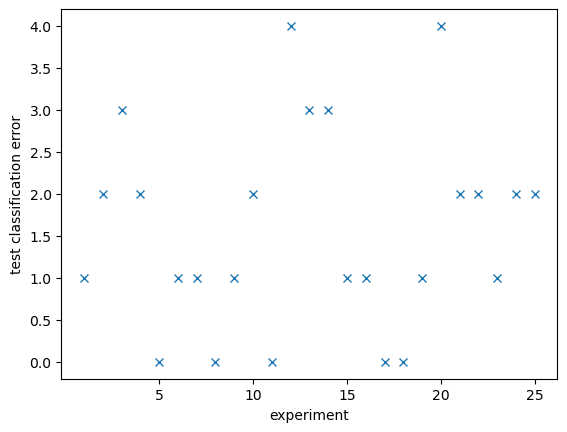

In [26]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn import datasets
import numpy as np
import tensorflow as tf
import pylab as plt

import os
if not os.path.isdir('figures'):
    os.makedirs('figures')

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

no_iters = 1000
no_labels = 3
no_features = 4
no_exps = 25

SEED = 10

tf.compat.v1.set_random_seed(SEED)
np.random.seed(SEED)

def ffn(x, hidden_units):

  # Hidden 
  with tf.name_scope('hidden'):
    weights = tf.Variable(
      tf.compat.v1.truncated_normal([no_features, hidden_units],
                            stddev=1.0 / np.sqrt(float(no_features))),
        name='weights')
    biases = tf.Variable(tf.zeros([hidden_units]),
                         name='biases')
    hidden = tf.nn.relu(tf.matmul(x, weights) + biases)
    
  # output
  with tf.name_scope('linear'):
    weights = tf.Variable(
        tf.compat.v1.truncated_normal([hidden_units, no_labels],
                            stddev=1.0 / np.sqrt(float(hidden_units))),
        name='weights')
    biases = tf.Variable(tf.zeros([no_labels]),
                         name='biases')
    logits = tf.matmul(hidden, weights) + biases
    
  return logits



# def main():
# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)
n = iris.data.shape[0]

print(iris.target.shape)

X = iris.data
no_data = len(iris.data)
Y = np.zeros((no_data, no_labels))
for i in range(no_data):
    Y[i, iris.target[i]] = 1


x = tf.compat.v1.placeholder(tf.float32, [None, no_features])
y_ = tf.compat.v1.placeholder(tf.float32, [None, no_labels])

y = ffn(x, 5)

# Create the model

cross_entropy = tf.reduce_mean(
    tf.compat.v1.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))

error = tf.reduce_sum(tf.cast(tf.not_equal(tf.argmax(y, axis=1), tf.argmax(y_, axis=1)), dtype=tf.int32))

train = tf.compat.v1.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)


err = []
for exp in range(no_exps):

    idx = np.arange(n)
    np.random.shuffle(idx)
    XX, YY = X[idx], Y[idx]
    x_train, y_train, x_test, y_test = XX[:100], YY[:100], XX[100:], YY[100:]
    
    # train
    with tf.compat.v1.Session() as sess:
        tf.compat.v1.global_variables_initializer().run()

        
        for i in range(no_iters):
            train.run(feed_dict={x:x_train, y_: y_train})
        err.append(error.eval(feed_dict={x:x_test, y_:y_test}))


    print('exp %d error %g'%(exp, err[exp]))

print('* mean error = %g *'% np.mean(err))

     

plt.figure(1)
plt.plot(np.arange(no_exps)+1, err, marker = 'x', linestyle = 'None')
plt.xticks([5, 10, 15, 20, 25])
plt.xlabel('experiment')
plt.ylabel('test classification error')
plt.savefig('./figures/6.1a_1.png')


plt.show()

# if _name_ == '_main_':
#     main()